# **Practice 3 - Naive Bayes and Linear Regression** 
## Machine Learning – LECD, LEEC
### Informatics Engineering Department

## Useful documentation
- Pandas – [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
- Numpy – [https://numpy.org/doc/stable/](https://numpy.org/doc/stable/)
- Scikit-learn – [https://scikit-learn.org/stable/documentation.html](https://scikit-learn.org/stable/documentation.html)
- Matplotlib – [https://matplotlib.org/contents.html](https://matplotlib.org/contents.html)
- Seaborn – [https://seaborn.pydata.org/](https://seaborn.pydata.org/)



# Part 1 - Naive Bayes

#### Let's use the dataset `placement.csv` containing applicants data regarding placement on a certain campus. The `status` column is the target variable.


#### Ex 1 - Import the following libraries:

pandas\
numpy\
seaborn\
matplotlib.pyplot\
from sklearn.model_selection, train_test_split\
from sklearn.metrics, classification_report, confusion_matrix, accuracy_score

In [1]:
# Answer here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


#### Ex 2 - Load data from local csv file using `pd.read_csv`

In [2]:
# Answer here
df = pd.read_csv("placement.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


#### Ex 3 - Explore the dataset (dataframe) in terms of `shape`, `info`, `describe()`, `isnull().sum`, `count` and `groupby`

In [3]:
# Answer here
df.shape
#df.info
#df.describe
#df.isnull().sum
#df.count
#df.groupby

(215, 14)

#### Ex 4 - Explore with visually `seaborn` library

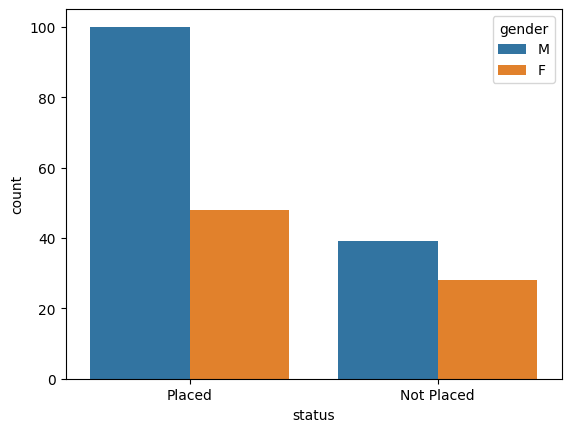

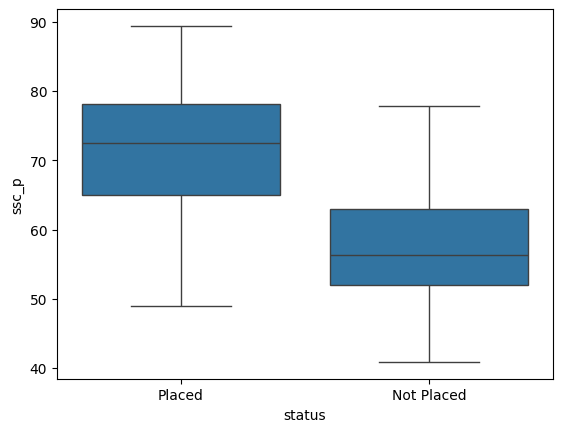

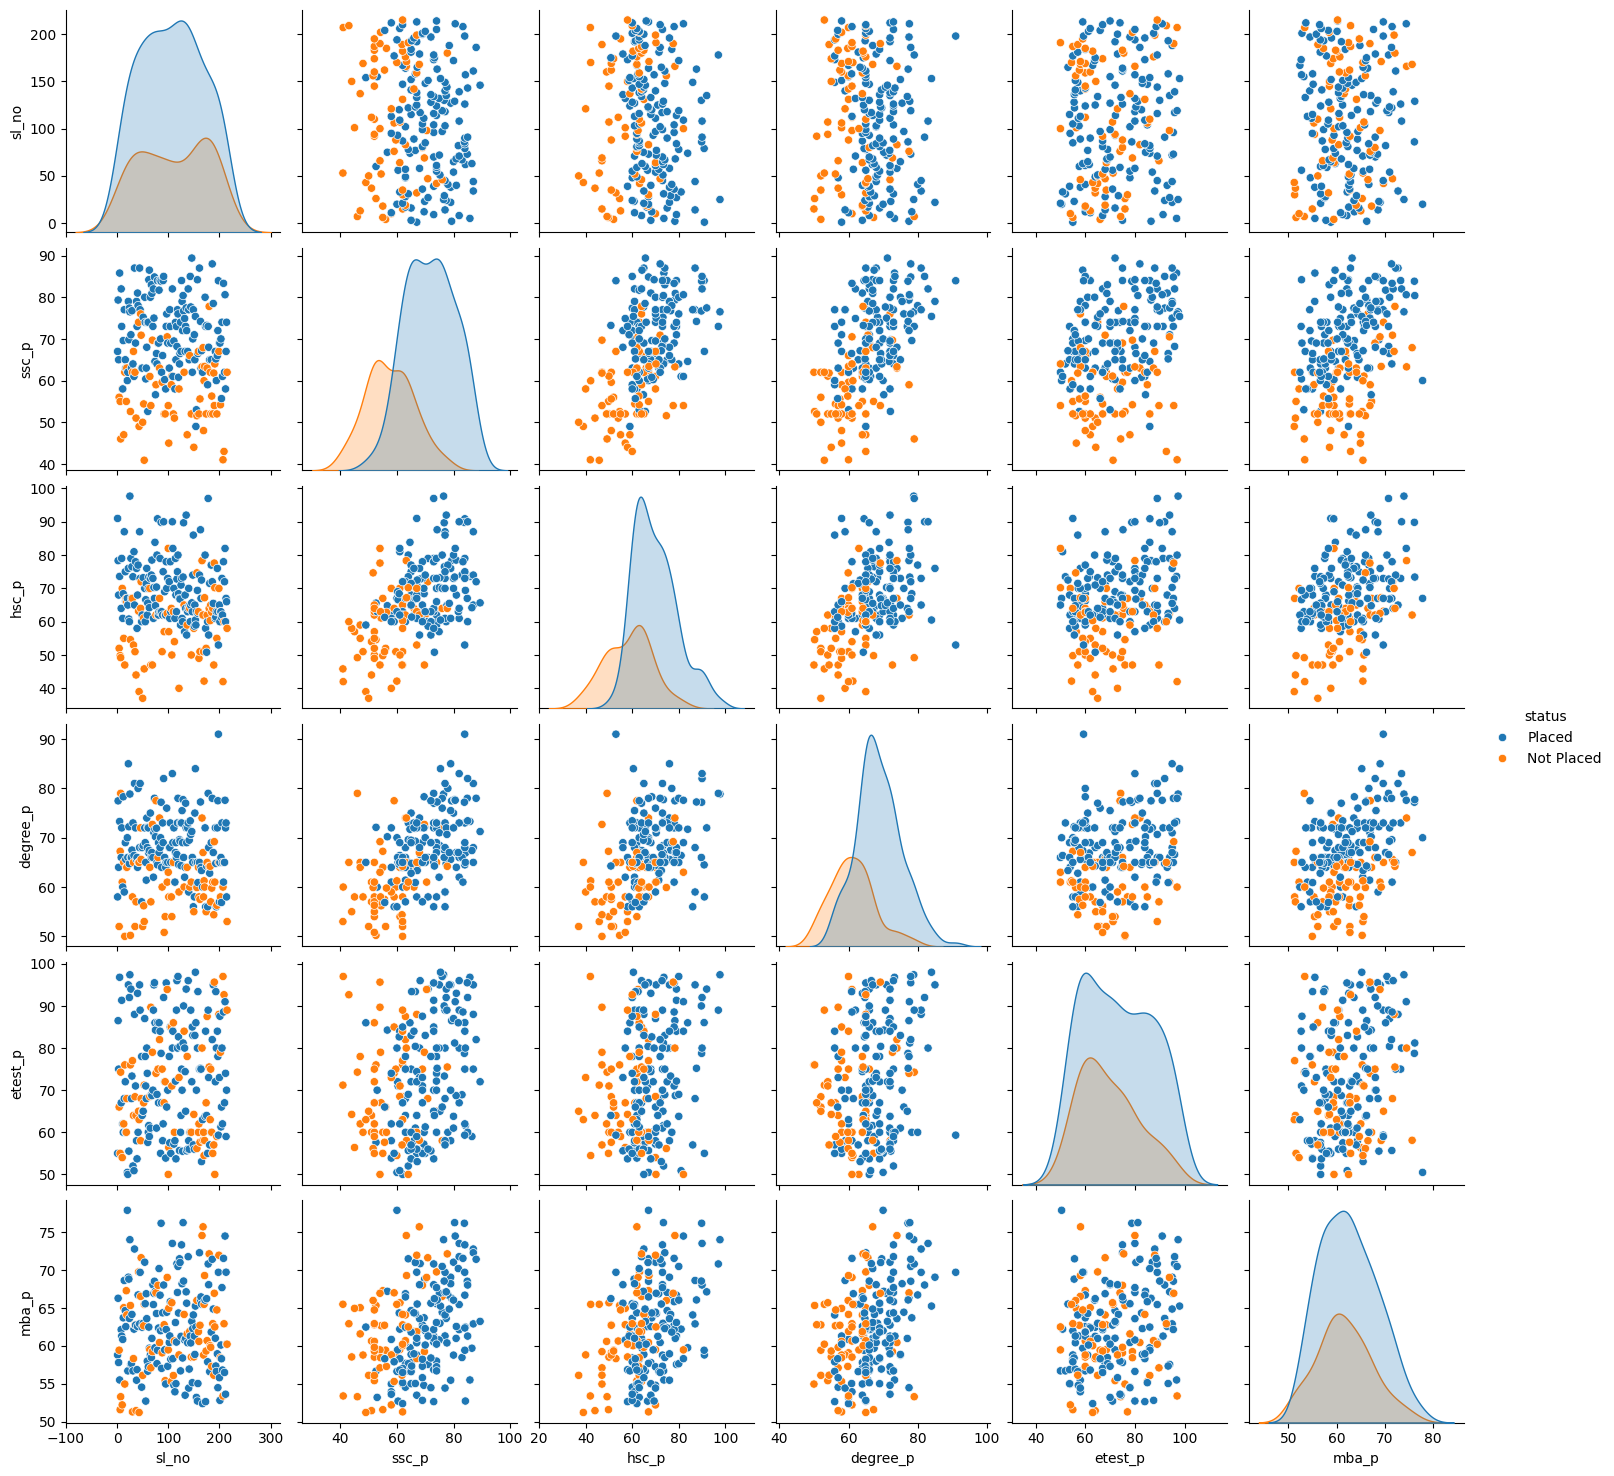

In [4]:
# Answer here
sns.countplot(x = 'status', hue = 'gender',data = df)
plt.show()

sns.boxplot(x = 'status', y = 'ssc_p', data = df)
plt.show()

sns.pairplot(df, hue = 'status')
plt.show()

#### Ex 5 - Transform the one of the categorical features (e.g. workex) into numericals with `pd.get_dummies` (use the option `drop_first=True` to get the one-hot enconding) and join the result with the dataframe with `pd.concat`

In [5]:
# Answer here
workexdummies = pd.get_dummies(df["workex"],drop_first=True)
df = pd.concat([df,workexdummies],axis = 1)
df=df.rename(columns = {'Yes':'workex'})
workexdummies

,Yes
0,False
1,True
2,False
3,False
4,False
...,...
210,False
211,False
212,True
213,False


#### Ex 6 - Check the types using `df.types` and drop all categorical/object columns (other preprocessing could be helpful, this is the simplest form). For the latter, use `df.select_dtypes` and `df.drop`. Extra: as a categorical variable, should `status` be removed also?

In [6]:
# Answer here
df.dtypes
categorical_columns = df.select_dtypes(include = ['object','category']).columns
categorical_columns = categorical_columns.drop('status')
df.drop(categorical_columns,axis = 1, inplace = True)
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status
0,1,67.00,91.00,58.00,55.0,58.80,Placed
1,2,79.33,78.33,77.48,86.5,66.28,Placed
2,3,65.00,68.00,64.00,75.0,57.80,Placed
3,4,56.00,52.00,52.00,66.0,59.43,Not Placed
4,5,85.80,73.60,73.30,96.8,55.50,Placed
...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,Placed
211,212,58.00,60.00,72.00,74.0,53.62,Placed
212,213,67.00,67.00,73.00,59.0,69.72,Placed
213,214,74.00,66.00,58.00,70.0,60.23,Placed


#### Ex 7 - Create X and y (features and target), X is all variables but `status` and `sl_no`, and y = `status`. Note that `sl_no` is just a serial number (similar to an id number), having no impact in the status

In [7]:
# Answer here
X = df.drop(['status','sl_no'],axis = 1)
y= df['status']

print(X)
print(y)

     ssc_p  hsc_p  degree_p  etest_p  mba_p
0    67.00  91.00     58.00     55.0  58.80
1    79.33  78.33     77.48     86.5  66.28
2    65.00  68.00     64.00     75.0  57.80
3    56.00  52.00     52.00     66.0  59.43
4    85.80  73.60     73.30     96.8  55.50
..     ...    ...       ...      ...    ...
210  80.60  82.00     77.60     91.0  74.49
211  58.00  60.00     72.00     74.0  53.62
212  67.00  67.00     73.00     59.0  69.72
213  74.00  66.00     58.00     70.0  60.23
214  62.00  58.00     53.00     89.0  60.22

[215 rows x 5 columns]
0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object


#### Ex 8 - Create train and test splits (30% for test) using `train_test_split`. Other % can be tested. Fix the `random_state`

In [8]:
# Answer here
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

#### Ex 9 - Import the classifier `GaussianNB` from `sklearn.naive_bayes`

In [9]:
# Answer here
from sklearn.naive_bayes import GaussianNB

#### Ex 10 - `Instantiate` a `GaussianNB` model and `train` with the `fit` method

In [10]:
# Answer here
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

#### Ex 10 - Get predictions `y_pred` with the `predict` method 

In [11]:
# Answer here
predicted = gnb.predict(X_test)

#### Ex 11 - Print `classification report`, `confusion matrix` and `accuracy score`

In [12]:
# Answer here
report = classification_report(predicted, y_test)
print('Classification Report:\n', report)
confusionmatrix=confusion_matrix(y_test, predicted)
accuracy = accuracy_score(y_test, predicted)
accuracy
confusionmatrix

Classification Report:
               precision    recall  f1-score   support

  Not Placed       0.52      0.69      0.59        16
      Placed       0.89      0.80      0.84        49

    accuracy                           0.77        65
   macro avg       0.71      0.74      0.72        65
weighted avg       0.80      0.77      0.78        65



array([[11, 10],
       [ 5, 39]])

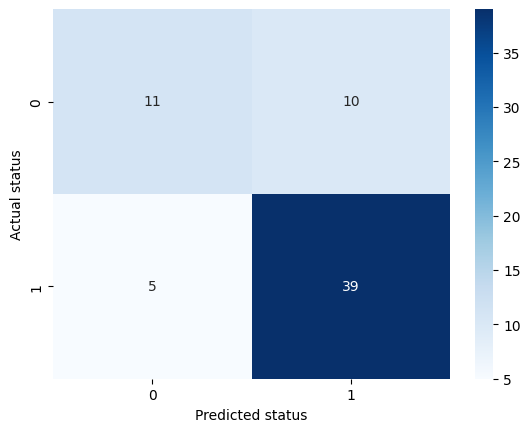

In [13]:
ax=sns.heatmap(confusionmatrix,annot=True,cmap='Blues')
ax.set_xlabel('Predicted status')
ax.set_ylabel('Actual status')
plt.show()

# Part 2 - Linear Regression

#### Let's use the two datasets, namely, `LR1.txt` and `LR2.txt` for Linear Regression. Whereas the first is univariate, the second is multivariate

#### Ex1 - Start with the necessary imports. Note that this is only necessary if you are starting from Part 2

pandas\
numpy\
matplotlib.pyplot\
seaborn

### Univariate Case

#### Ex2 - Load `LR1.txt` and give names `A` and `B`to the features

In [14]:
# Answer here
data1 = pd.read_csv('LR1.txt', names = ['A','B']) 

#### Ex3 - Get some insight into the data, e.g. take a look at the `head` and use the `describe()` method

In [15]:
# Answer here
data1.head()
data1.describe()

,A,B
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


#### Ex4 - Visualize the relationship between A and B. Use `matplotlib` to create a `scatter plot` of A (x-axis) against B (y-axis)

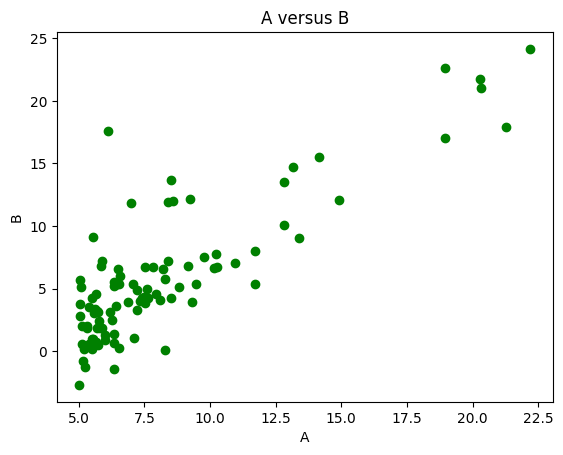

In [16]:
# Answer here
X = data1['A'].values
y = data1['B'].values
m = len(y)
plt.scatter(X,y, color = 'green')
plt.ylabel('B')
plt.xlabel('A')
plt.title('A versus B')
plt.show()

#### Ex 5 - Import the class `LinearRegression` from `sklearn.linear_model` and instantiate a model `lr` 

In [17]:
# Answer here
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#### Ex6 - Create `X` and `y`, and train the model `lr` with the `fit` method 

In [18]:
# Answer here
X = np.array(data1['A']).reshape(-1, 1)
y = np.array(data1['B']).reshape(-1, 1)
lr.fit(X,y)

LinearRegression()

#### Ex7 - Create a data set `xtest` containing evenly spaced 1000 points to test the model using `np.linspace` over an appropriate range

In [19]:
# Answer here
xtest = np.linspace(5, 25, num = 1000)
xtest

array([ 5.        ,  5.02002002,  5.04004004,  5.06006006,  5.08008008,
        5.1001001 ,  5.12012012,  5.14014014,  5.16016016,  5.18018018,
        5.2002002 ,  5.22022022,  5.24024024,  5.26026026,  5.28028028,
        5.3003003 ,  5.32032032,  5.34034034,  5.36036036,  5.38038038,
        5.4004004 ,  5.42042042,  5.44044044,  5.46046046,  5.48048048,
        5.5005005 ,  5.52052052,  5.54054054,  5.56056056,  5.58058058,
        5.6006006 ,  5.62062062,  5.64064064,  5.66066066,  5.68068068,
        5.7007007 ,  5.72072072,  5.74074074,  5.76076076,  5.78078078,
        5.8008008 ,  5.82082082,  5.84084084,  5.86086086,  5.88088088,
        5.9009009 ,  5.92092092,  5.94094094,  5.96096096,  5.98098098,
        6.001001  ,  6.02102102,  6.04104104,  6.06106106,  6.08108108,
        6.1011011 ,  6.12112112,  6.14114114,  6.16116116,  6.18118118,
        6.2012012 ,  6.22122122,  6.24124124,  6.26126126,  6.28128128,
        6.3013013 ,  6.32132132,  6.34134134,  6.36136136,  6.38

#### Ex8 - Predict the output `ypred` using the model with the `predict` method

In [20]:
# Answer here
ypred = lr.predict(xtest.reshape(-1, 1))
ypred

array([[ 2.06938734],
       [ 2.0932719 ],
       [ 2.11715646],
       [ 2.14104101],
       [ 2.16492557],
       [ 2.18881013],
       [ 2.21269469],
       [ 2.23657924],
       [ 2.2604638 ],
       [ 2.28434836],
       [ 2.30823292],
       [ 2.33211747],
       [ 2.35600203],
       [ 2.37988659],
       [ 2.40377115],
       [ 2.4276557 ],
       [ 2.45154026],
       [ 2.47542482],
       [ 2.49930938],
       [ 2.52319393],
       [ 2.54707849],
       [ 2.57096305],
       [ 2.59484761],
       [ 2.61873216],
       [ 2.64261672],
       [ 2.66650128],
       [ 2.69038584],
       [ 2.71427039],
       [ 2.73815495],
       [ 2.76203951],
       [ 2.78592407],
       [ 2.80980862],
       [ 2.83369318],
       [ 2.85757774],
       [ 2.8814623 ],
       [ 2.90534685],
       [ 2.92923141],
       [ 2.95311597],
       [ 2.97700053],
       [ 3.00088508],
       [ 3.02476964],
       [ 3.0486542 ],
       [ 3.07253876],
       [ 3.09642331],
       [ 3.12030787],
       [ 3

#### Ex9 - Plot the prediction results (i.e., a `line`) on the top of a `scatter plot` with the original data points

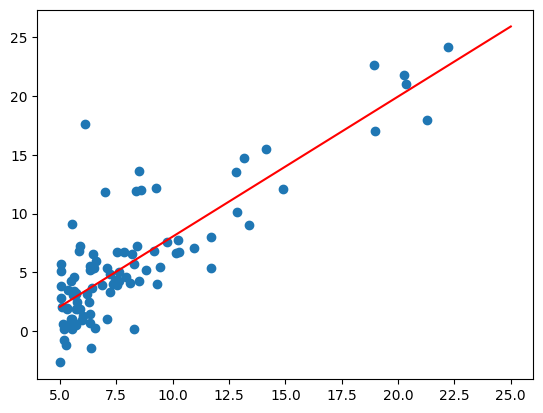

In [21]:
# Answer here
plt.scatter(X,y)
plt.plot(xtest,ypred, color = 'red')

plt.show()

#### Ex10 - Analyze the model's parameters, namely, `slope` and `intercept`.

In [22]:
# Answer here


print('Model slope: ', lr.coef_[0])
print('Model intercept: ', lr.intercept_[0])

Model slope:  [1.19303364]
Model intercept:  -3.8957808783118484


#### Ex11 - Compute some errors metrics, namely, `mean_squared_error` and `mean_absolute_error`. Note: need to import them first

mean_squared_error, mean_absolute_error both from sklearn.metrics

In [23]:
# Answer here
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [24]:
predicted_B = lr.predict(np.array(X.reshape(-1,1)))

model_error = mean_squared_error(y,predicted_B)

print(f"The mean squared error of the optimal model is {model_error:.2f}")

abserror = mean_absolute_error(y,predicted_B)
abserror

The mean squared error of the optimal model is 8.95


2.1942453988270065

#### Ex12 - Comment on those errors

##### Answer here:

#### Ex12 - Using the estimated model, predict B for two arbitrary new values of A

In [25]:
# Answer here
A1 = ...
A2 = ...
print(lr.predict(np.array([[...]])))
print(lr.predict(np.array([[...]])))

TypeError: float() argument must be a string or a real number, not 'ellipsis'

### Multivariate (2D) Case - Multidimensional linear regression (analyze and extend as homework)

#### Ex12 - Load `LR2.txt`, check head, shape, and describe

In [ ]:
# Answer here
... = pd.read_csv(..., names = [...])
....head()

#### Ex13 - Define `X` and `y`, and get the length `m` of `y`

In [ ]:
# Answer here
X = data2.drop(labels = [...], axis = 1) 
y = data2[...]
m = len(y)

#### Ex14 - Before proceeding to training, define a normalization (z-score standardization) function "by hand" that returns the `normalized data` and the original `mean` and `standard deviation`

In [ ]:
# Answer here
def featureStandardNormalize(X):
    mean = np.mean(..., axis = 0) # Define the mean per column
    std = np.std(..., axis = 0) # Define the standard deviation per column
    X_norm = (X - ...) / ... # define scaling transformation

    return ... # return the values.

#### Ex15 - Why is it important to save and return the original mean and standard deviation?

##### Answer here:

#### Ex16 - Apply the newly defined function to `X`

In [ ]:
# Answer here
X_norm,...,.... = featureStandardNormalize(...)

#### Ex17 - Same as Ex16, but now use the `StandardScaler` (z-score) from `sklearn.preprocessing`. Note: need to import it first

In [ ]:
# Answer here
from ... import ...
zscaler = ....
X_norm2 = ....fit_transform(...)

#### Ex18 - Compare the normalized data from Ex16 and Ex17. Concatenation along the axis 1 can be used to easily compare dataframes side by side

In [ ]:
# Answer here
X_norm2 = pd.DataFrame(X_norm2, columns = ['A', 'B'])

compare = pd.concat([..., ...], axis = 1)
compare.head()

#### Ex19 - `Instantiate` and `fit` a linear regression model with `fit_intercept = True` as argument

In [ ]:
# Answer here
import warnings
warnings.filterwarnings('ignore')
model2 = ...(fit_intercept = True)
model2.fit(...,...)

#### Ex20 - `Predict` for an arbitrary new point, but first normalize it

In [ ]:
# Answer here
newInput = [...,...]
newInputnormalized = (newInput-...)/...
print(model2.predict(np.array([...])))